# Perancangan Model Prediksi Survivabilitas Korban Kapal RMS Titanic
by Ardian Wiedilaksono(FGA Machine Learning Universitas Satya Wacana)

Pada Notebook ini, akan dilakukan analisis terhadap data penumpang RMS Titanic menggunakan Decision Tree. Sehingga dapat diketahui  tingkat survivabilitas berdasarkan karakteristik - karakteristik tertentu

#Persiapan

## Import Library dan Data

Kita import **numpy** (untuk perhitungan matematika dan olah array), **pandas** (untuk meng-handle dataset), dan **matplotlib** (untuk visualisasi data).

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Kemudian, kita import data. Untuk memudahkan data agar tidak perlu upload setiap kali reset runtime, maka kita perlu mount **google drive** terlebih dahulu.

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setelah google drive berhasil di mount, baru kita import data menggunakan **pandas**.

In [76]:
df = pd.read_csv('/content/drive/My Drive/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pemeriksaan Data
Sebelum data kita ubah ubah, kita perlu melakukan pemeriksaan data agar kita mengerti apa saja yang akan kita lakukan dengan data ini.

In [77]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dari statistika deskriptif diatas, sudah terdapat beberapa informasi yang bisa didapatkan. Seperti tingkat survivabilitasnya sebesar 38%, kemudian rata - rata penumpang berumur 29 tahun, dan sebagainya. Namun, statistika deskriptif  tidak bisa digunakan untuk melihat data yang NaN (tidak memiliki value). Oleh karena itu kita gunakan count untuk menghitung datanya secara keseluruhan

In [78]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Ternyata terdapat 891 baris data. Untuk Age hanya 714 data (177 data hilang), Cabin hanya 204 data (687 data hilang), serta Embarked 889 data (2 data hilang). Pada kolom cabin, banyak data yang tidak ada valuenya, maka kolom Cabin akan di-drop. Karena prinsip dari klasifikasi adalah supervised learning, dimana jumlah data akan berpengaruh terhadap akurasi. 
Sehingga  variabel independen yang digunakan adalah :

*   Pclass : menunjukan tingkat ekonomi
*   Sex : jenis kelamin
*   Age : umur
*   Fare : ongkos
*   Embarked : naik dari pelabuhan mana 
*   Sibsp : jumlah saudara di kapal
*   Parch : jumlah orang tua di kapal
*   Deck : tempat duduk penumpang

Untuk Id dan name, tidak dimasukkan karena tidak mengandung informasi apapun, sedangkan Ticket sudah diwakili oleh Fare dan Deck

Selanjutnya kita buat data frame baru yang nantinya akan digunakan untuk mengolah data pada tahap Pengolahan Data.







In [79]:
dftree = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Survived']]
dftree.head()

,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch,Survived
0,3,male,22.0,7.2500,S,1,0,0
1,1,female,38.0,71.2833,C,1,0,1
2,3,female,26.0,7.9250,S,0,0,1
3,1,female,35.0,53.1000,S,1,0,1
4,3,male,35.0,8.0500,S,0,0,0


## Data Visualisasi
Keindahan data science tidak hanya pada perancangan model prediksi, melainkan juga visualisasi datanya. Sebelum masuk ke tahap berikutnya, kita lakukan visualisasi terlebih dahulu. Pada tahap ini, kita akan melakukan visualisasi data untuk mendapatkan informasi sebanyak - banyaknya hanya dengan melakukan visualisasi. Visualisasi yang akan dilakukan pada project ini akan dilakukan secara sederhana dan hanya menggunakan matplotlib. Pertama, kita buat dataframe baru khusus untuk melakukan visualisasi

In [0]:
plotdf = df

Selanjutnya kita coba untuk melakukan plot histogram pada umur.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21a3005358>]],
      dtype=object)

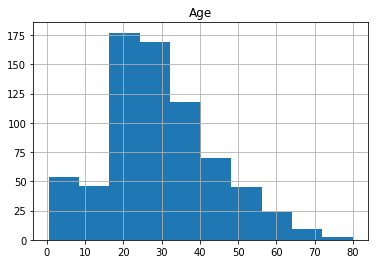

In [81]:
plotdf.hist(column = 'Age')

Tentunya, lebih presentatif jika menjikan dalam bentuk histogram daripada menggunakan statistika deskriptif saja. Sekarang ayo kita coba melihat tingkat survivabilitas. Namun sebelumnya perlu kita ganti labelnya dimana 0 berarti tidak selamat dan 1 berarti selamat.

In [0]:
plotdf['Survived'].replace({1 : 'Selamat' , 0 : 'Tidak Selamat'}, inplace = True)

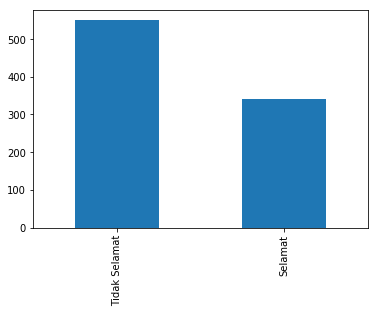

In [83]:
ax = plotdf['Survived'].value_counts().plot(kind = 'bar')

Kita coba juga untuk kolom Embarked.

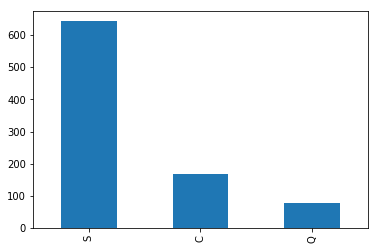

In [84]:
ax = plotdf['Embarked'].value_counts().plot(kind = 'bar')

# Pengolahan Data


## Persiapan Data
Sebelum masuk ke tahap pengolahan, dataset yang ada perlu kita siapkan terlebih dahulu. Seperti merubah data yang bersifat kualitatif menjadi kuantitatif, dan menghilangkan missing value. Pertama - tama, kita cek dahulu isi dari tiap kolom yang sifatnya kualitatif untuk memudahkan saat encoding dan drop data yang berisi NaN.

In [0]:
olahdf = dftree.dropna(subset=['Age', 'Embarked']) #melakukan drop data yang valuenya NaN

In [86]:
print(olahdf['Sex'].unique()) #melihat value dari kolom Sex

['male' 'female']


In [87]:
print(olahdf['Embarked'].unique())  #melihat value dari kolom Embarked

['S' 'C' 'Q']


Setelah itu, kita pisahkan variabel x (independen) dan y(dependen). Hal ini dilakukan untuk memudahkan pemrosesan data, dimana datanya harus berbentuk array. Selain itu data independen harus mengalami proses encoding terlebih dahulu.

In [88]:
x = olahdf[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp', 'Parch']].values #memasukkan variabel independen ke variabel bernama 'x'
x[0:5]

array([[3, 'male', 22.0, 7.25, 'S', 1, 0],
       [1, 'female', 38.0, 71.2833, 'C', 1, 0],
       [3, 'female', 26.0, 7.925, 'S', 0, 0],
       [1, 'female', 35.0, 53.1, 'S', 1, 0],
       [3, 'male', 35.0, 8.05, 'S', 0, 0]], dtype=object)

In [89]:
#melakukan encoding, dimana data kualitatif diubah menjadi kuantitatif.
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['male','female'])
x[:,1] = le_sex.transform(x[:,1])

le_embarked = preprocessing.LabelEncoder()
le_embarked.fit(['S', 'C', 'Q'])
x[:,4] = le_embarked.transform(x[:,4])


x[0:5]

array([[3, 1, 22.0, 7.25, 2, 1, 0],
       [1, 0, 38.0, 71.2833, 0, 1, 0],
       [3, 0, 26.0, 7.925, 2, 0, 0],
       [1, 0, 35.0, 53.1, 2, 1, 0],
       [3, 1, 35.0, 8.05, 2, 0, 0]], dtype=object)

In [0]:
y = olahdf['Survived'] #memasukkan variabel dependen ke variabel bernama 'y'

## Memecah Data
Selanjutnya, dilakukan Training untuk membuat model prediksi.

In [0]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 4) 
#memisahkan data kedalam training subset dan testing subset, dengan ukuran test size 0.2 , dan fungsi random 4.

## Training Data

In [92]:
# import fungsi Decision Tree dari sklearn. Agar pohon tidak lebar, maka kedalamannya di set sampai 10 saja.
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 10)
DT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [93]:
DT.fit(x_train,y_train) #melatih model dengan data training.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediksi
Jika data sudah di training, maka dilakukan testing sebagai bahan untuk evaluasi model.

In [0]:
peramalan = DT.predict(x_test) #Model akan mencoba memprediksi menggunakan testing subset variabel independen.

In [95]:
print(y_test[0:5]) # print array aktual
print(peramalan[0:5]) #print array prediksi

808    0
326    0
142    1
482    0
243    0
Name: Survived, dtype: int64
[0 0 0 0 0]


# Evaluasi Model

Selanjutnya adalah evaluasi model untuk melihat seberapa bagus model yang dihasilkan. Pertama - tama kita bisa melihat array aktual vs prediksi. Dari hasil dibawah, dapat dilihat bahwa 4 dari 5 prediksinya benar.

## Confussion Matrix
Untuk melihat hasil aktual vs prediksi dari seluruh data, dapat kita gunakan Confussion Matrix untuk melihatnya. Berikut adalah listing untuk Confussion Matrix :

In [0]:
#import library yang dibutuhkan untuk Confussion Matrix
!apt-get -qq install -y graphviz && pip install -q pydotplus
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

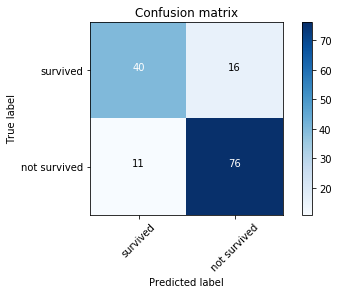

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, peramalan, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['survived','not survived'],normalize= False,  title='Confusion matrix')

## Akurasi
Hasil pada Confussion Matrix dapat dikategorikan mejadi 4, yaitu True Positive, False Positive, True Negative dan False Negative. True berarti prediksi benar, dan positive dalam kasus project ini adalah hidup. Pada model yang dihasilkan, terdapat 75 orang selamat + 42 tidak selamat yang diprediksi secara benar. Serta 14 selamat + 12 tidak selamat yang diprediksi salah. Kita bia menghitung akurasinya dengan listing yang ada di bawah.

In [98]:
from sklearn.metrics import accuracy_score
print ('Akurasinya adalah :' , accuracy_score(y_test, peramalan))

Akurasinya adalah : 0.8111888111888111


Sehingga, akurasi yang didapatkan sebesar 0.81 atau 81%. Dapat disimpulkan bahwa model yang dihasilkan cukup baik dalam memprediksi survivabilitas penumpang RMS Titanic.

## Visualisasi Model
Untuk melihat model Decision Tree, bisa dilihat pada gambar dibawah. Ukuran gambar cukup besar, sehingga lebih mudah bila di download atau gunakan tab baru. Hal ini disebabkan model cukup kompleks.

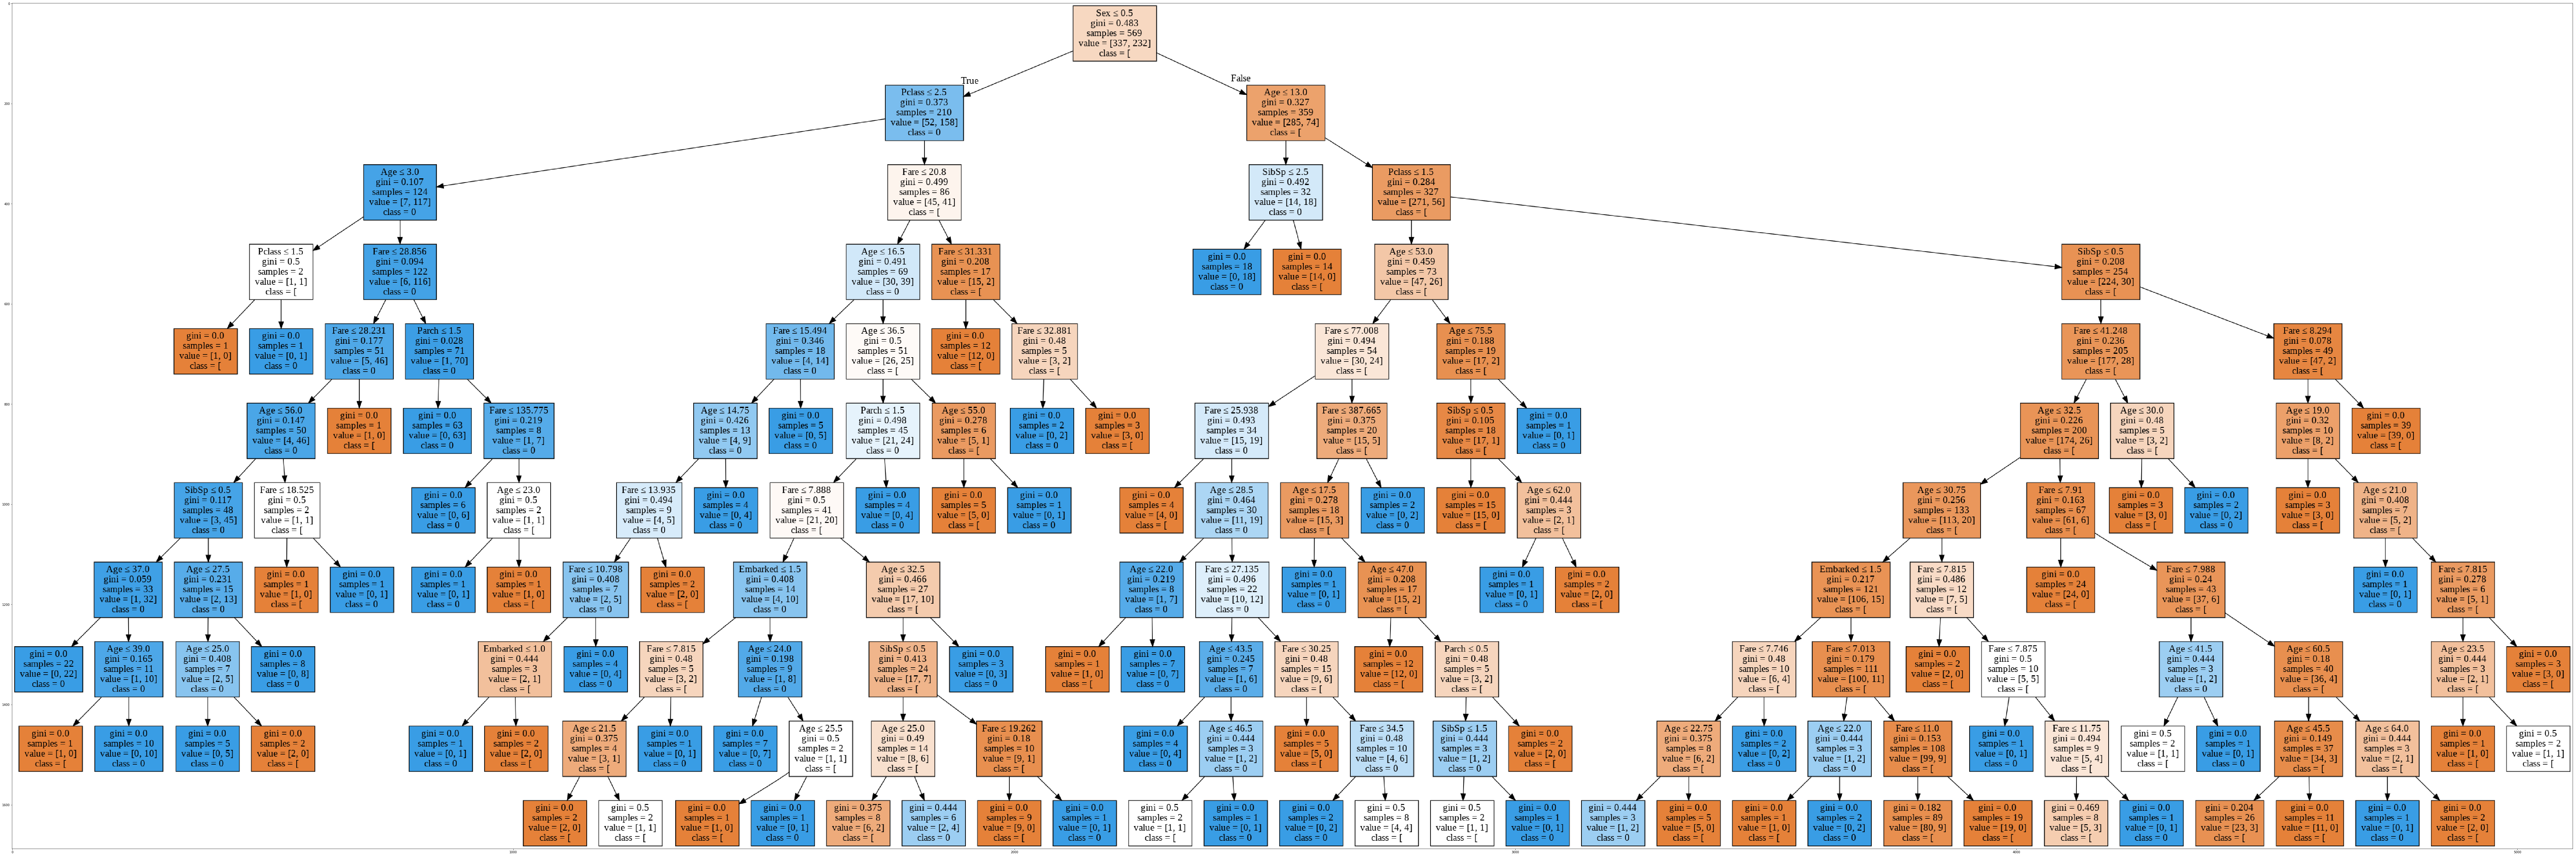

In [105]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = dftree.columns[0:7]
targetNames = dftree["Survived"].unique().tolist()
out=tree.export_graphviz(DT,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_train)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(150, 200))
plt.imshow(img,interpolation='nearest')

Sekian project dari saya. Terima kasih atas perhatiannya.